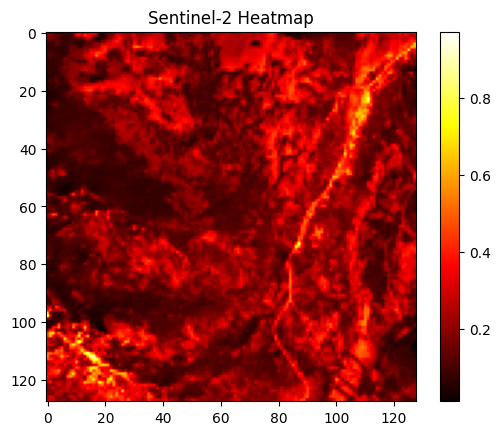

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/101.tif') as src:
    band4 = src.read(4)  # Red band
    band3 = src.read(3)  # Green band
    band2 = src.read(2)  # Blue band

# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))

# Create heatmap
heatmap = (normalized_band4 + normalized_band3 + normalized_band2) / 3

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

Min pixel value: 104, Max pixel value: 572


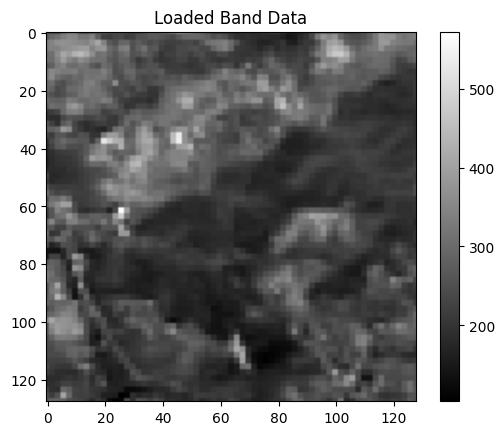

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
file_path = 'data/images/1.tif'  # Update this path to your actual image file

# Open the image and check pixel values
with rasterio.open(file_path) as src:
    band_data = src.read(1)  # Read the first band
    print(f'Min pixel value: {np.min(band_data)}, Max pixel value: {np.max(band_data)}')

# Visualize the band
plt.imshow(band_data, cmap='gray')
plt.colorbar()
plt.title('Loaded Band Data')
plt.show()

Band 2 Min: -28, Max: 846
Band 3 Min: -2, Max: 1099
Band 4 Min: 2, Max: 1297
Band 8 Min: 64, Max: 160
Band 11 Min: 10, Max: 90


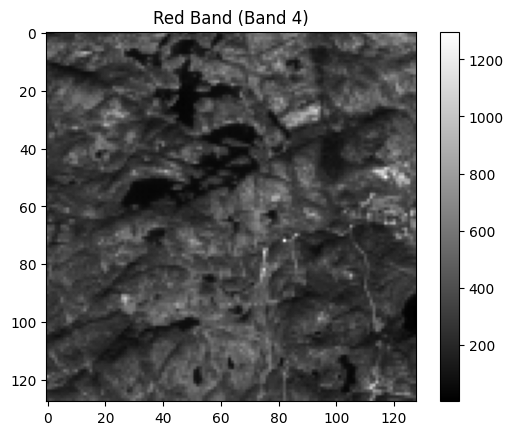

In [32]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
file_path = 'data/images/0.tif'  # Update this path to your actual image file

# Open the multi-band image
with rasterio.open(file_path) as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band
    band11 = src.read(11)  # SWIR1 band

# Check the pixel values
print(f"Band 2 Min: {np.min(band2)}, Max: {np.max(band2)}")
print(f"Band 3 Min: {np.min(band3)}, Max: {np.max(band3)}")
print(f"Band 4 Min: {np.min(band4)}, Max: {np.max(band4)}")
print(f"Band 8 Min: {np.min(band8)}, Max: {np.max(band8)}")
print(f"Band 11 Min: {np.min(band11)}, Max: {np.max(band11)}")

# Visualize one of the bands
plt.imshow(band4, cmap='gray')
plt.colorbar()
plt.title('Red Band (Band 4)')
plt.show()

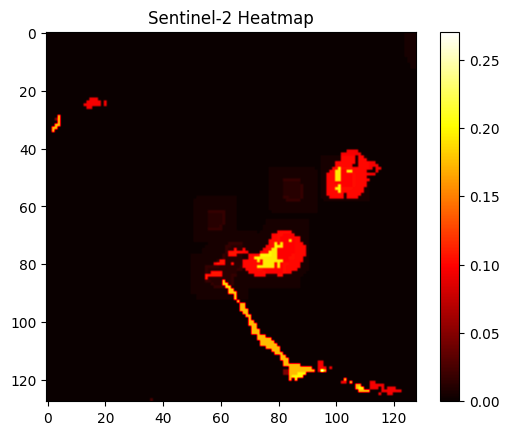

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/105.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band8+normalized_band11) / 5

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

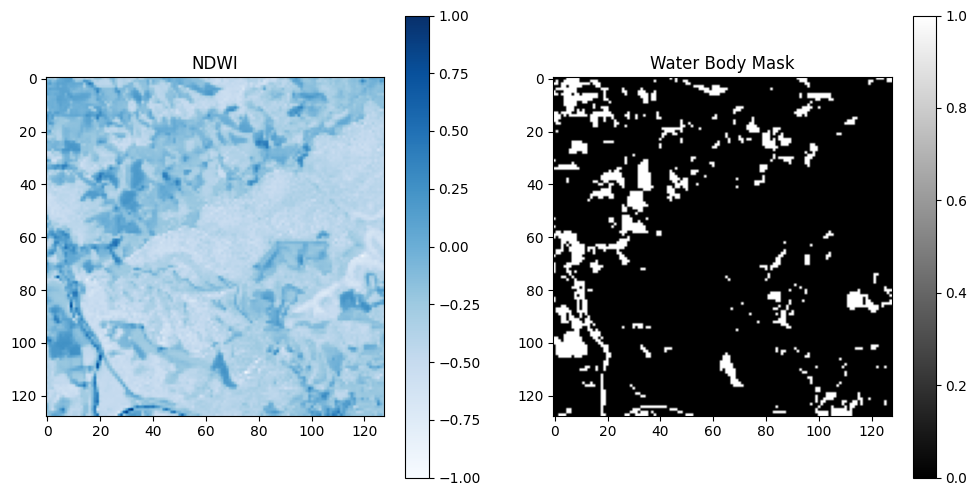

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/1.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band
    band11 = src.read(11)  # SWIR1 band
    band5=src.read(5)

# Normalize the bands
def normalize(band):
    return (band - np.min(band)) / (np.max(band) - np.min(band))

normalized_band2 = normalize(band2)
normalized_band3 = normalize(band3)
normalized_band4 = normalize(band4)
normalized_band8 = normalize(band8)
normalized_band11 = normalize(band11)
normalized_band5 = normalize(band5)


# Calculate NDWI (Normalized Difference Water Index)
ndwi = (normalized_band3 - normalized_band5) / (normalized_band3 + normalized_band5)

# Threshold NDWI to detect water bodies
water_threshold = 0.0  # Adjust based on observations
water_mask = ndwi > water_threshold

# Display NDWI and water mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ndwi, cmap='Blues')
plt.colorbar()
plt.title('NDWI')

plt.subplot(1, 2, 2)
plt.imshow(water_mask, cmap='gray')
plt.colorbar()
plt.title('Water Body Mask')

plt.show()

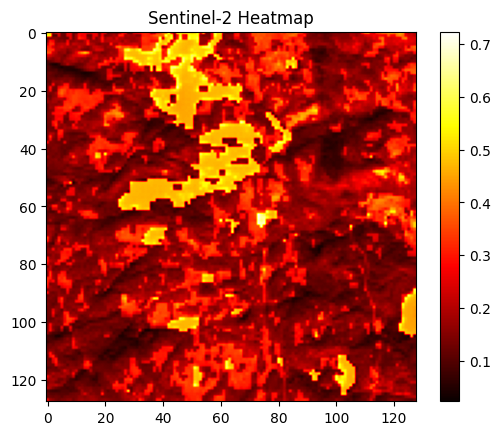

In [34]:
##The modified normalized water index (MNDWI) Green+SWIR
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/0.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band3+normalized_band11) / 2

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

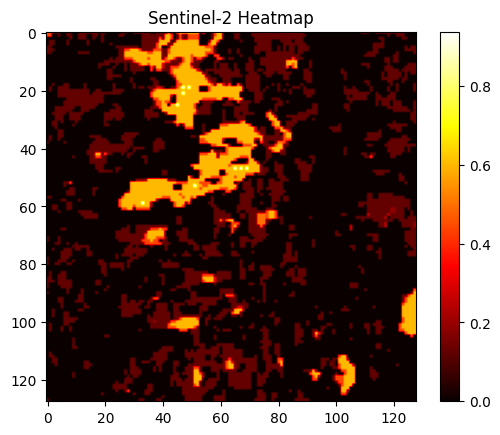

In [29]:
##NDWI NIR+SWIR
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/0.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band8+normalized_band11) / 2

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()

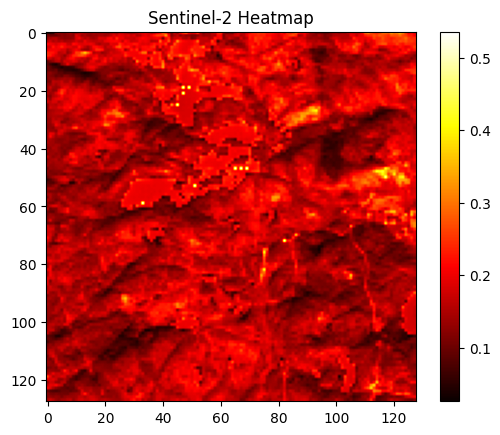

In [33]:
##NDWI NIR+Green
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the Sentinel-2 image
with rasterio.open('data/images/0.tif') as src:
    band2 = src.read(2)  # Blue band
    band3 = src.read(3)  # Green band
    band4 = src.read(4)  # Red band
    band8 = src.read(8)  # NIR band   -->detect Water
    band11 = src.read(11)  # SWIR1 band --. Detect water 


# Normalize the data
normalized_band4 = (band4 - np.min(band4)) / (np.max(band4) - np.min(band4))
normalized_band3 = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))
normalized_band2 = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
normalized_band8 = (band8 - np.min(band8)) / (np.max(band8) - np.min(band8))
normalized_band11 = (band11 - np.min(band11)) / (np.max(band11) - np.min(band11))

# Create heatmap
heatmap = (normalized_band3+normalized_band8) / 2

# Display the heatmap
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('Sentinel-2 Heatmap')
plt.show()